# First notebook on XGBoost

Material adapted from [machinelearningmastery](http://machinelearningmastery.com/xgboost-python-mini-course/)

Link for installing xgboost on windows [link](https://stackoverflow.com/questions/35139108/how-to-install-xgboost-in-anaconda-python-windows-platform)

In [43]:
# First XGBoost model for Pima Indians dataset
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [35]:
# load data
diabetes = pd.read_csv('../datasets/diabetes.csv')
# split data into X and y
X = diabetes.iloc[:,0:-1]
Y = diabetes.iloc[:,-1]
# Y = LabelEncoder().fit_transform(Y)

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [36]:
# No evaluation set
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [38]:
# With evaluation set
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


In [40]:
print model.feature_importances_

[ 0.05090909  0.22909091  0.06909091  0.07636364  0.04727273  0.17818181
  0.12        0.22909091]


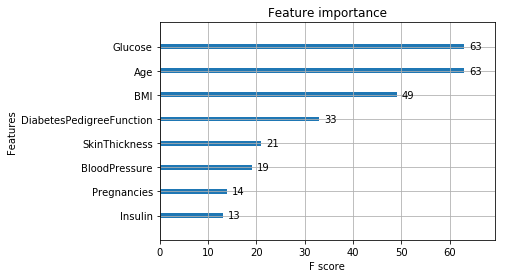

In [46]:
from xgboost import plot_importance
plot_importance(model);

## Lesson 06: How to Configure Gradient Boosting

Gradient boosting is one of the most powerful techniques for applied machine learning and as such is quickly becoming one of the most popular.

But how do you configure gradient boosting on your problem?

A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

- Learning rate or shrinkage (**learning_rate** in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.
- The depth of trees (**tree_depth** in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
- Row sampling (**subsample** in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.

These are a good starting points when configuring your model.

A good general configuration strategy is as follows:

1. Run the default configuration and review plots of the learning curves on the training and validation datasets.
2. If the system is overlearning, decrease the learning rate and/or increase the number of trees.
3. If the system is underlearning, speed the learning up to be more aggressive by increasing the learning rate and/or decreasing the number of trees.

Owen Zhang, the former #1 ranked competitor on Kaggle and now CTO at Data Robot proposes an interesting strategy to configure XGBoost.

He suggests to set the number of trees to a target value such as 100 or 1000, then tune the learning rate to find the best model. This is an efficient strategy for quickly finding a good model.